# Fourier Series: Straight Lines and Polygons
This notebook shows how to compute the Fourier series of straight lines and polygons.

### Content
1. [Prerequisites](#prerequisites)
2. [Representing Straight Lines](#representation)
    1. Polygons
3. [Fourier Series of Straight Lines](#fourier_computation)
    1. [Proof](#proof)
    2. [Implementation](#implementation)
4. [Example](#example)

In [1]:
%matplotlib inline

# Initial imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Prerequisites <a id='prerequisites'></a>
This notebook shows how to compute the Fourier series of straight lines and polygones. For this, you should be familiar with:
- The general computation of [Fourier series of curves](Fourier-Series-of-Curves-Background.ipynb) and especially the case of piecewiese defines curves.
- Complex numbers, especially the representation of 2-dimensional points as complex numbers
- Computation of integrals of curves

## Representing Straight Lines <a id='representation'></a>
A straight line $g:[0,1]\to\mathbb{C}$ from point $p_0\in\mathbb{C}$ to point $p_1\in\mathbb{C}$ with $g(0)=p_0$ and $g(1) = p_1$ can be written as

$$
\begin{equation}
    g(t) = (1-t)\cdot p_0 + t\cdot p_1 \label{eqn:straigt_line_01}
\end{equation}
$$

For the computation of the Fourier Series, we need a curve defined over the interval $[0,2\pi]$; for a polygon, which is a piecewise concatenation of straight lines, each piece $i$ would be defined over an interval $[t_i,t_{i+1}]$. For this reason, we generalize ($\ref{eqn:straigt_line_01}$) to a function $g:[a,b]\to\mathbb{C}$ with $g(a)=p_0$ and $g(b) = p_1$:

$$
\begin{align}
    g(t) &= \frac{b-t}{b-a}\cdot p_0 + \frac{t-a}{b-a}\cdot p_1 \label{eqn:straigt_line_ab}\\
         &= \frac{p_0b - p_1a}{b-a} + \frac{p_1-p_0}{b-a}t \label{eqn:straigt_line_by_t}
\end{align}
$$

### Polygons
Polygons are a sequence of straight lines, connecting corner points $p_0,\ldots,p_n$ with $p_n = p_0$ for closing the curve.

## Fourier Series of Straight Lines <a id='fourier_computation'></a>
As described in the [introduction of Fourier series of curves](Fourier-Series-of-Curves-Background.ipynb) we need to solve the integral $\int_a^b g(t)e^{-i\lambda t}dt$ for an arbitrary straight line $g$ and any choice of $a$, $b$ and $\lambda$ in order to compute the Fourier series of straight lines and polygons.

_Case 1:_ $\lambda=0$:  
$$ 
    \int_a^b g(t)e^{-i\lambda t}dt = \frac{1}{2}\left(p_1 + p_2)(b - a)\right)
$$

_Case 2:_ $\lambda\neq 0$:  
$$ 
    \int_a^b g(t)e^{-i\lambda t}dt = \frac{ie^{-i\lambda b}}{\lambda}p_2 - \frac{ie^{-i\lambda a}}{\lambda} p_1
           +\frac{1}{\lambda^2}\frac{p_2-p_1}{b-a}\left(e^{-i\lambda b}-e^{-i\lambda a}\right)
$$


### Proof: <a id='proof'></a>
Using (\ref{eqn:straigt_line_by_t}), we can compute the integral as:  
_Case 1:_ $\lambda=0$:  
$$ 
\begin{align*}
    \int_a^b g(t)e^{-i\lambda t}dt &= \int_a^b g(t)dt \\
        &= \frac{p_1b - p_2a}{b-a}\left(b-a\right) + \frac{p_2-p_1}{b-a}\frac{1}{2}\left(b^2-a^2\right)\\
        &= \left(p_1b - p_2a\right) + \frac{1}{2}\left(p_2-p_1\right)\left(a+b\right)\\
        &= \frac{1}{2}\left(p_1b - p_2a + p_2b - p_1a\right)\\
        &= \frac{1}{2}\left(p_1 + p_2\right)\left(b - a\right)
\end{align*}
$$

_Case 2:_ $\lambda\neq 0$:  
$$
\begin{align*}
    \int_a^b g(t)e^{-i\lambda t}dt &= \int_a^b \left(\frac{p_1b - p_2a}{b-a} + \frac{p_2-p_1}{b-a}t\right)e^{-i\lambda t}dt\\
        &= \frac{p_1b - p_2a}{b-a} \int_a^b e^{-i\lambda t}dt + \frac{p_2-p_1}{b-a}\int_a^b te^{-i\lambda t}dt\\
        &= \frac{p_1b - p_2a}{b-a} \left[\frac{e^{-i\lambda t}}{-i\lambda}\right]_{t=a}^b + \frac{p_2-p_1}{b-a}\left(\left[\frac{te^{-i\lambda t}}{-i\lambda}\right]_{t=a}^b-\int_a^b \frac{e^{-i\lambda t}}{-i\lambda}dt\right)\\
        &= \frac{i}{\lambda}\frac{p_1b - p_2a}{b-a} \left(e^{-i\lambda b}-e^{-i\lambda a}\right) + \frac{i}{\lambda}\frac{p_2-p_1}{b-a}\left(be^{-i\lambda b}-ae^{-i\lambda a}\right) + \frac{1}{\lambda^2}\frac{p_2-p_1}{b-a}\left(e^{-i\lambda b}-e^{-i\lambda a}\right)\\
        &=\\
        &= \frac{e^{-i\lambda b}}{b-a} \frac{i}{\lambda}\left(p_1b - p_2a + p_2b - p_1b\right)-\frac{e^{-i\lambda a}}{b-a} \frac{i}{\lambda}\left(p_1b - p_2a + p_2a - p_1a\right) + \frac{1}{\lambda^2}\frac{p_2-p_1}{b-a}\left(e^{-i\lambda b}-e^{-i\lambda a}\right)\\
        &= \frac{ie^{-i\lambda b}}{\lambda}p_2 - \frac{ie^{-i\lambda a}}{\lambda} p_1 +\frac{1}{\lambda^2}\frac{p_2-p_1}{b-a}\left(e^{-i\lambda b}-e^{-i\lambda a}\right)
\end{align*}
$$

### Implementation <a id='implementation'></a>
Beginning with a single staight line segment

In [3]:
def transform_straight_line(p1, p2, l, a, b):
    i = 1j   # Just for shorter notations
    
    l = np.asarray(l)
    result = np.zeros(shape=l.shape, dtype=np.complex)
    
    # Handle Case k != 0
    l_ = l[l!=0]
    result[l!=0] = i * np.exp(-i*l_*b) * p2 / l_ \
           - i * np.exp(-i*l_*a) * p1 / l_ \
           + (p2 - p1) * (np.exp(-i*l_*b) - np.exp(-i*l_*a)) / (l_*l_*(b - a))
    
    # Handle case k=0
    result[l==0] = (p1 + p2) * (b - a) / 2
    
    # Return results
    return result

Extending this to closed sequences of lines. Here we scale the period so that the length $T=2\pi$.

_Note:_ There are different ways to determine the segment-borders $t_0,\ldots,t_m$. Here we use the length of the lines.

In [4]:
def transform_polygon(p, n):
    m = len(p)   # Number of Segments (if we close the path)
    
    # Close the curve: add the beginning point at the end
    p = np.reshape(p, (-1))
    p = p[list(range(m)) + [0]]
    
    # Length of the segments
    l = np.abs(p[1:] - p[:-1])
    
    # Compute t_0 to t_m based on the lengths with t_0 = 0 and t_m = 2\pi
    t = l.cumsum() / l.sum()
    t = 2 * np.pi * np.concatenate([[0], t])
    
    # get vector of k
    k = np.arange(-n,n+1)
    
    c = sum([transform_straight_line(p[i], p[i+1], k, t[i], t[i+1]) for i in range(m)])
    
    return c, k


Get the fourier approximation as a function.  
This will be used to plot the fourier approximation.

In [5]:
def get_fourier_fct(c, k):
    # Reshape the fourier coefficients row vectors
    c = np.reshape(c, (1,-1))
    k = np.reshape(k, (1,-1))
    
    def fct(t):
        # Reshape the input values into a column vector
        t = np.reshape(t, (-1,1))
        
        return np.sum(c * np.exp(1j * k * t), axis=1) / (2 * np.pi)
    
    return fct

## Example: Triangle <a id='example'></a>
Works also with other polygons, just add or modify points.

In [6]:
# Corner points of the triangle as complex numbers
p = [-1 -1j,
     0.5 + 3j,
     12
    ]

In [7]:
N = 12

# Compute coefficients c_{-N} to c_N
c,k = transform_polygon(p, N)

# Get approximations (limited to different values n=1,...,N)
fcts = [get_fourier_fct(c[np.abs(k) <= n], k[np.abs(k) <= n]) for n in range(1,N+1)]

Plotting the results

In [8]:
# plot closed curve of complex 
def plotcc(p, *args, **kwargs):
    # close curve
    m = len(p)
    p = np.reshape(p, (-1))
    p = p[list(range(m)) + [0]]     # Closing the curve
    
    # Complex to real x and y vectors
    x, y = np.real(p), np.imag(p)
    
    plt.plot(x, y, *args, **kwargs)

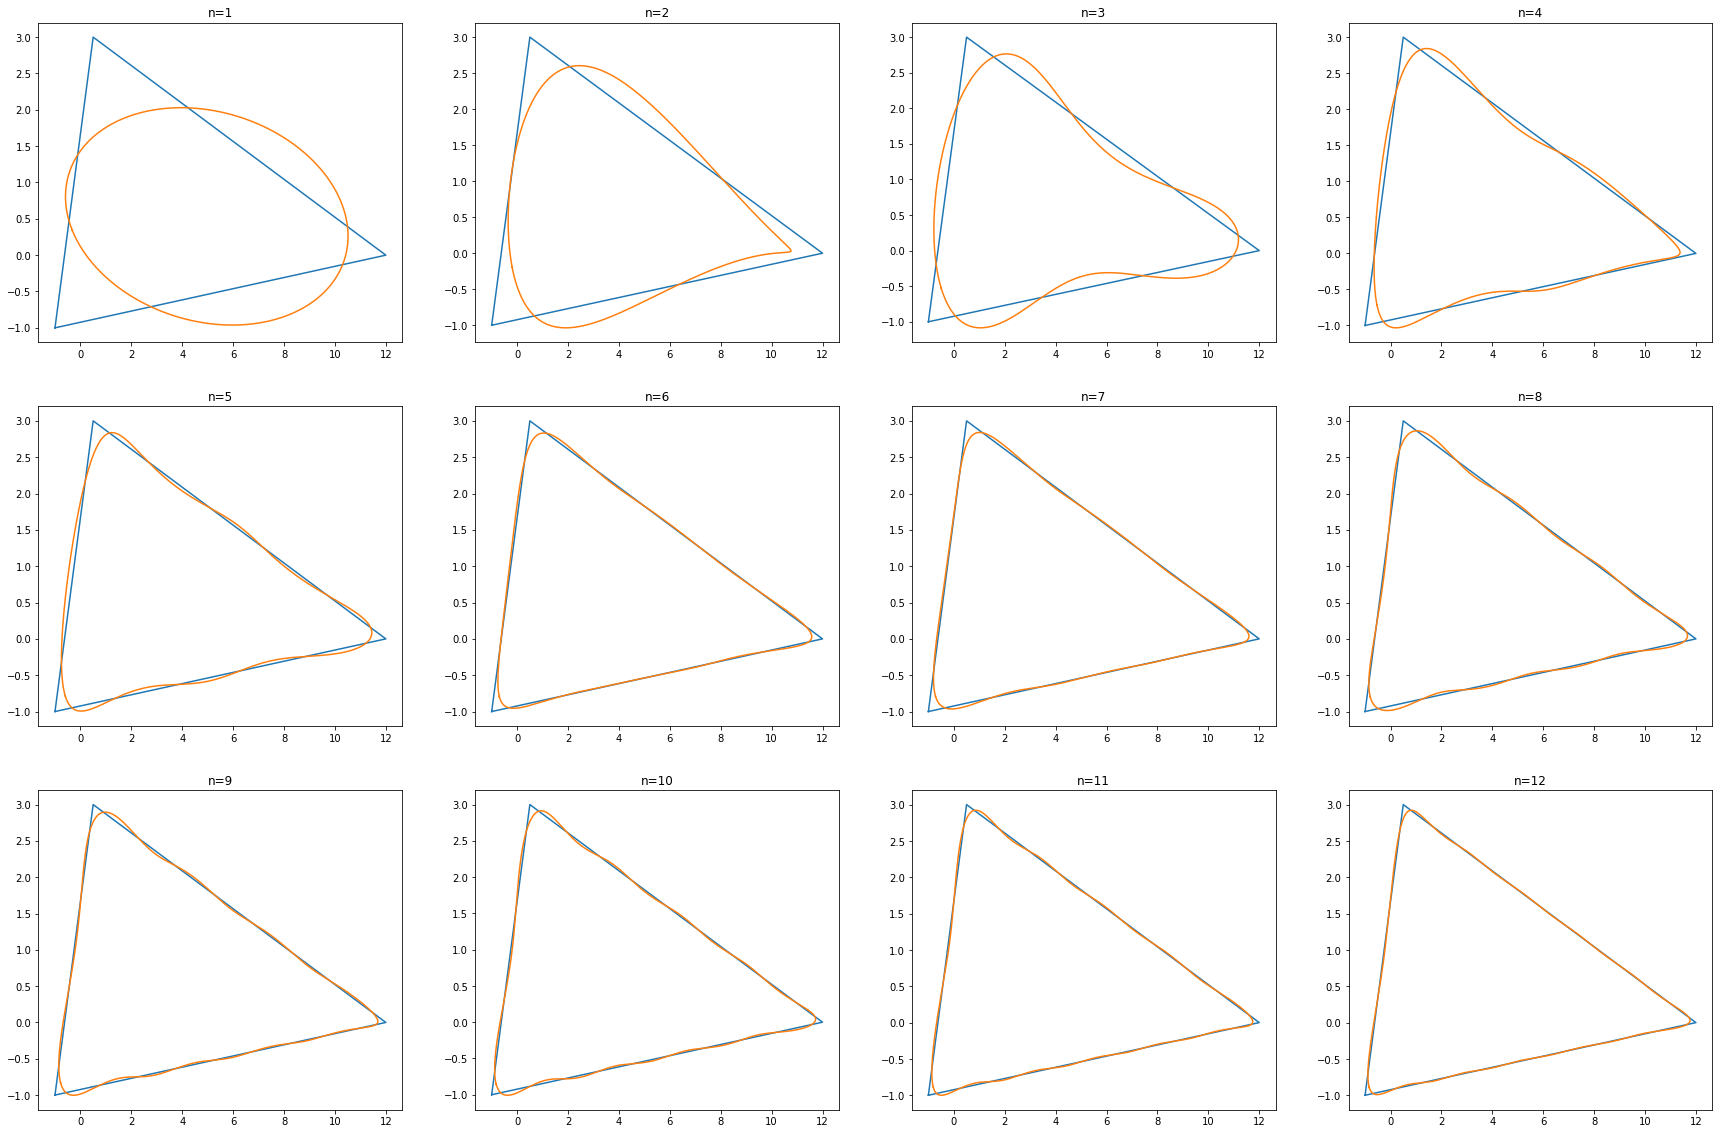

In [9]:
plt.figure(figsize=(30,20))

# Number of points
nT = 1000

t = 2 * np.pi * np.arange(0,1, 1/nT)

for n in range(1, N+1):
    pf = fcts[n-1](t)
    
    plt.subplot(3,4,n)
    plotcc(p)
    plotcc(pf)
    plt.title(f"n={n}")

plt.show()